In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv('datasets/circles.csv', sep=',')

x1 = np.array(dataset['x1'].values)
x2 = np.array(dataset['x2'].values)
y = np.array(dataset['y'].values)

X_ = np.array(dataset[['x1', 'x2']].values)
scaler = StandardScaler()
X = scaler.fit_transform(X_)

In [2]:
class LogisticRegression:

    def __init__(self, learning_rate=0.1, epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.epochs_weights = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid_func(linear_model)

            update_weights = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            update_bias = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * update_weights
            self.bias -= self.lr * update_bias
            self.epochs_weights.append(np.append(self.weights, self.bias))
            
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid_func(linear_model)
        y_predicted_classes = [1 if i > 0.5 else 0 for i in y_predicted]
        return y_predicted_classes

    def sigmoid_func(self, x):
        return 1 / (1 + np.exp(-x))

In [3]:
log_regr = LogisticRegression(learning_rate=0.1, epochs=500)
log_regr.fit(X, y)

print(log_regr.weights)

[ 9.88838641e-17 -4.40388466e-17]


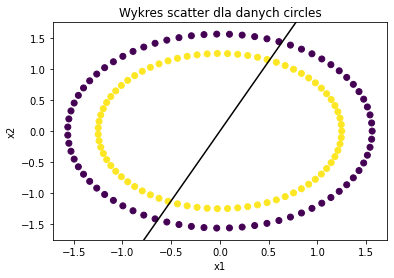

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-log_regr.weights[0] * x0_1 - log_regr.bias) / log_regr.weights[1]
x1_2 = (-log_regr.weights[0] * x0_2 - log_regr.bias) / log_regr.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')
ymin = np.amin(X[:, 1])
ymax = np.amax(X[:, 1])
ax.set_ylim([-1.75, 1.75])

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Wykres scatter dla danych circles')
plt.show()

#### Granica nie została prawidłowo wyznaczona, gdyż zbiór nie jest liniowo separowalny

In [5]:
#X - macierz o wymiarach (ilość_próbek, 2)
def map_features(X, degree):
    X_poly = np.ones((X.shape[0], 1))
    for i in range(1, degree + 1):
        for j in range(i + 1):
            X_poly = np.append(X_poly, (X[:, 0] ** (i - j) * X[:, 1] ** j).reshape((X.shape[0], 1)), axis=1)
    return X_poly

In [6]:
X_poly = map_features(X, 2)

In [7]:
print(X_poly.shape)
print(X_poly[0, :])

(150, 6)
[ 1.         -1.45206692  0.57491396  2.10849833 -0.83481354  0.33052606]


In [8]:
log_poly = LogisticRegression(learning_rate=0.1, epochs=500)
log_poly.fit(X_poly, y)


print(log_poly.weights)
print(log_poly.bias)

[ 2.02973135e+00  6.65150254e-16  4.42376585e-17 -2.10709524e+00
  7.94656599e-17 -2.10709524e+00]
2.0297313452849464


In [9]:
X_poly_pred = log_poly.predict(X_poly)

In [10]:
print(X_poly_pred)

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]


In [11]:
print(y)

[0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0
 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 1 1
 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0
 0 1]


In [12]:
def plot_with_decision_boundary(X, Y, degree, clf):
    x1 = np.linspace(-1.5, 1.5, 500)
    x2 = np.linspace(-1.5, 1.5, 500)

    X1, X2 = np.meshgrid(x1, x2)
    X_test =  np.append(X1.ravel()[:, np.newaxis], X2.ravel()[:, np.newaxis], axis=1)
    
    X_test_poly = map_features(X_test, degree)
    Y_pred = clf.predict(X_test_poly)

    X1 = X1.reshape((len(x1), len(x2)))
    X2 = X2.reshape((len(x1), len(x2)))
    Y_pred = np.array(Y_pred).reshape((len(x1), len(x2)))
    
    # plot data
    plt.scatter(X[:, 0], X[:, 1], c=Y)

    # plot decision boundary
    plt.contour(X1, X2, Y_pred, levels=[0.5], cmap="Greys_r")
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Granica decyzyjna')
    
    plt.show()

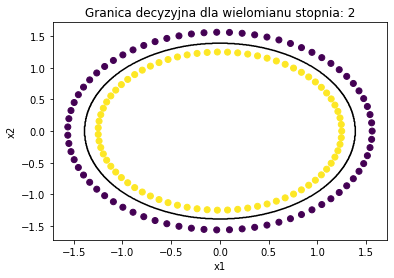

In [13]:
plot_with_decision_boundary(X, y, 2, log_poly)

In [14]:
X_poly3 = map_features(X, 3)
print(X_poly3.shape)
log_poly3 = LogisticRegression(learning_rate=0.1, epochs=500)
log_poly3.fit(X_poly3, y)

print(log_poly3.weights)
print(log_poly3.bias)

(150, 10)
[ 2.02973135e+00  6.12271946e-16  4.88971291e-17 -2.10709524e+00
  8.16585931e-17 -2.10709524e+00  1.15549720e-16 -7.45466970e-17
  2.64821882e-17  9.40481325e-17]
2.029731345284947


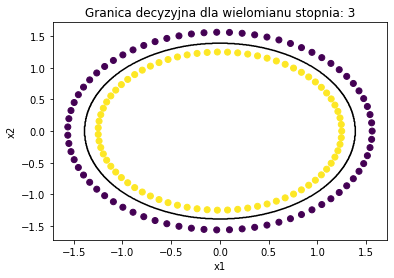

In [15]:
plot_with_decision_boundary(X, y, 3, log_poly3)

In [16]:
X_poly4 = map_features(X, 4)
print(X_poly4.shape)
log_poly4 = LogisticRegression(learning_rate=0.1, epochs=500)
log_poly4.fit(X_poly4, y)

print(log_poly4.weights)
print(log_poly4.bias)

(150, 15)
[ 2.52222821e+00  4.82042740e-16  2.61345521e-17  3.25634652e-01
  1.83198164e-16  3.25634652e-01  6.37419506e-16 -1.02396051e-17
  4.99275597e-16 -1.13624062e-17 -1.61027950e+00  2.13598377e-16
 -1.88856815e+00 -7.71319270e-17 -1.61027950e+00]
2.522228214402213


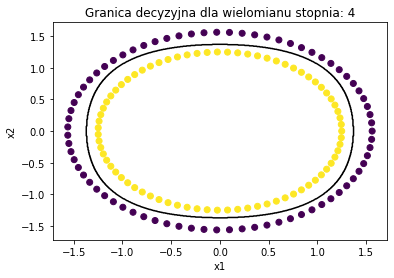

In [17]:
plot_with_decision_boundary(X, y, 4, log_poly4)

In [18]:
X_poly8 = map_features(X, 8)
print(X_poly8.shape)
log_poly8 = LogisticRegression(learning_rate=0.1, epochs=500)
log_poly8.fit(X_poly8, y)

print(log_poly8.weights)
print(log_poly8.bias)

(150, 45)
[ 1.57706075e+00 -1.33490667e-13  2.19345308e-17  8.61817190e-01
 -1.34621047e-17  8.61817190e-01 -6.22095751e-14  1.38058094e-17
 -1.97443153e-13 -2.34722785e-17  6.77026415e-01  7.72113109e-18
 -2.31895902e-01 -4.53439663e-17  6.77026415e-01  4.33468533e-13
  9.85804408e-17 -2.21462684e-13 -7.91849084e-17 -5.21727877e-13
 -7.73111667e-17  3.34981198e-01  5.47407937e-17 -6.11873058e-01
 -1.08319540e-16 -6.11873058e-01  8.73561639e-18  3.34981198e-01
 -3.50210881e-13  1.09794923e-16  2.07668713e-12  9.98112562e-18
 -2.71937986e-12 -2.48762527e-16  1.14050390e-12  7.05307898e-17
 -5.97250005e-01  1.00077451e-16 -1.08188287e+00 -1.03621786e-16
 -9.24165645e-01 -9.16286110e-17 -1.08188287e+00  1.63513220e-16
 -5.97250005e-01]
1.577060746804392


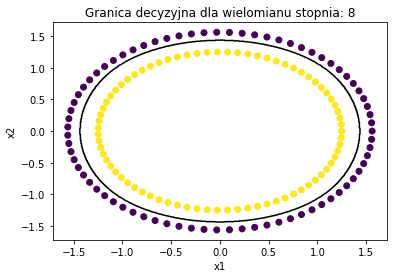

In [19]:
plot_with_decision_boundary(X, y, 8, log_poly8)